In [11]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy.linalg as LA


In [64]:

def generate_random_position(params):
    x = random.random() * (params["xmax"] - params["xmin"]) + params["xmin"]
    y = random.random() * (params["ymax"] - params["ymin"]) + params["ymin"]
    z = random.random() * (params["zmax"] - params["zmin"]) + params["zmin"]
    return np.array([x, y, z])

def generate_random_formation(nodes, params):
    ret_poses = {}
    for _id in nodes:
        pos = generate_random_position(params) 
        yaw = random.random()*6.28-3.14
        
        for idj in ret_poses:
            while LA.norm(ret_poses[idj][0:2] - pos[0:2]) > params["planar_safe_distance"]:
                pos = generate_random_position(params)
        
        if params["local_frame"]:
            #Elimate start point
            pos = pos - np.array(nodes[_id]["start_point"])
        ret_poses[_id] = [pos[0], pos[1], pos[2], yaw]
    return ret_poses

def generate_random_mission(nodes, params):
    poses_stamped =  { _id:[] for _id in nodes} # {id: [T X Y Z YAW]}
    for i in range(params["points"]):
        ts = i*params["t_duration"]
        ret = generate_random_formation(nodes, params)
        for _id in ret:
            arr = ret[_id]
            arr.insert(0, ts)
            poses_stamped[_id].append(arr)
    return poses_stamped

def generate_random_missions_to_files(nodes, params, folder="", show=True, mission_id=0):
    missions = generate_random_mission(nodes, params)
    if show:
        fig = plt.figure(f"Trajs", figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax = fig.gca(projection='3d')
        
    for _id in missions:
        mission = np.array(missions[_id])
        if (show):
            ax.plot(mission[:,1], mission[:,2],mission[:,3], label=f"Trajectory {_id}")
            plt.grid()
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Y$')
            ax.set_zlabel('$Z$')
    
    
        np.savetxt(f"{folder}/mission_{mission_id}_drone{_id}.csv", mission, fmt="%.3f")

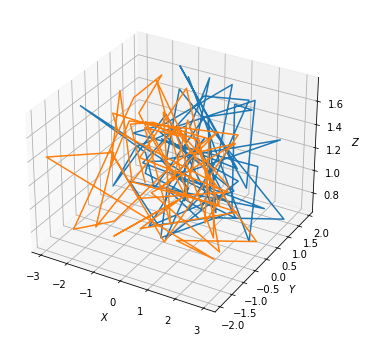

In [65]:
random_mission_params = {
    "xmin": -3,
    "xmax": 3,
    "ymin": -1,
    "ymax": 2,
    "zmin": 0.6,
    "zmax": 1.8,
    "local_frame": True,
    "t_duration": 5.0,
    "points": 60,
    "planar_safe_distance": 1.0
}

nodes = {
    1: {
        "start_point": [0.0, 0.0, 0.0]
    },
    4: {
        "start_point": [0.0, 1.0, 0.0]
    },
}

generate_random_missions_to_files(nodes, random_mission_params, "missions")